In [ ]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 18.3 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 18.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 18.7 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
try:
    df = pd.read_csv('pex.csv')
except Exception as e:
    print(f"Error reading the CSV file: {e}")

In [4]:
df.shape

(1544846, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544846 entries, 0 to 1544845
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Cost Element        1544846 non-null  int64  
 1   Posting Date        1544846 non-null  object 
 2   Value in Obj. Crcy  1544846 non-null  float64
 3   Week Number         1544846 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 47.1+ MB


In [6]:
df.describe()

,Cost Element,Value in Obj. Crcy,Week Number
count,1.544846e+06,1.544846e+06,1.544846e+06
mean,8.967748e+06,2.879259e-02,2.469637e+01
std,9.004473e+05,7.005005e+03,1.513721e+01
min,7.000060e+06,-9.708130e+05,1.000000e+00
25%,9.423010e+06,-8.424000e+01,1.200000e+01
50%,9.430410e+06,-1.404000e+01,2.200000e+01
75%,9.430410e+06,4.488000e+01,3.800000e+01
max,9.430420e+06,9.708130e+05,5.200000e+01


In [7]:
df.head(10)

,Cost Element,Posting Date,Value in Obj. Crcy,Week Number
0,7299050,2023-01-02,367.80,1
1,9430410,2023-01-02,88.16,1
2,9430410,2023-01-02,-88.16,1
3,9430410,2023-01-02,129.92,1
4,9430410,2023-01-02,-129.92,1
5,9430410,2023-01-02,88.16,1
6,9430410,2023-01-02,-88.16,1
7,9430410,2023-01-02,109.04,1
8,9430410,2023-01-02,-109.04,1
9,9430410,2023-01-02,88.16,1


In [28]:
df['Posting Date']  = pd.to_datetime(df['Posting Date'], format='%Y-%m-%d', errors='coerce')

In [29]:
df.set_index('Posting Date', inplace=True)

In [30]:
grouped_df = df.groupby(['Cost Element', 'Posting Date', 'Week Number']).agg({'Value in Obj. Crcy':'sum'}).reset_index()

In [31]:
grouped_df.shape

(13102, 4)

In [32]:
grouped_df.to_csv('pex_grouped.csv', index=False)

In [33]:
# Get Yearly data,  Change year if want to analyse data more
yearly_df = grouped_df[grouped_df['Posting Date'].dt.year == 2024]
yearly_df = yearly_df[yearly_df['Cost Element'] == 9430410] # Maximum records are there only for this one cost element in the data set

In [34]:
# Creating a PIVOT For easy viewing
pivot_df = yearly_df.pivot_table(index='Week Number', columns='Cost Element', values='Value in Obj. Crcy', aggfunc='sum')
pivot_df.fillna(0, inplace=True)

In [35]:
import matplotlib.pyplot as plt

In [36]:
pivot_df.columns[:4]

Index([9430410], dtype='int64', name='Cost Element')

Plotting 9430410...


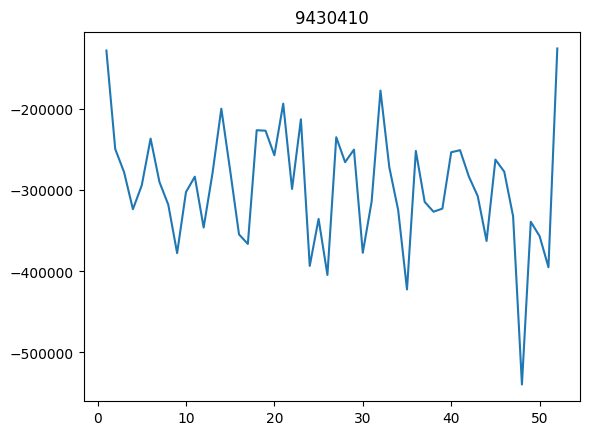

In [37]:
"""
For Each cost element we hava a different pattern 
7100050 - Stationary
7000290 - seasonal
9430410 - Maximum records

Most of the CE cant be used for plotting as there is no data for them
"""

for column in pivot_df.columns[:15]:
    print(f"Plotting {column}...")
    plt.plot(pivot_df.index, pivot_df[column], label=column)
    plt.title(column)
    plt.show()

## To Understand more about the data in terms of Cost Elements

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv('pex.csv')
df.head(2)

,Cost Element,Posting Date,Value in Obj. Crcy,Week Number
0,7299050,2023-01-02,367.80,1
1,9430410,2023-01-02,88.16,1


In [40]:
df.columns, df.shape

(Index(['Cost Element', 'Posting Date', 'Value in Obj. Crcy', 'Week Number'], dtype='object'),
 (1544846, 4))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544846 entries, 0 to 1544845
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Cost Element        1544846 non-null  int64  
 1   Posting Date        1544846 non-null  object 
 2   Value in Obj. Crcy  1544846 non-null  float64
 3   Week Number         1544846 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 47.1+ MB


In [42]:
df.isnull().sum()

Cost Element          0
Posting Date          0
Value in Obj. Crcy    0
Week Number           0
dtype: int64

In [43]:
df["Cost Element"].value_counts().to_csv('cost_element_counts.csv')

In [44]:
ce_names = df["Cost Element"].value_counts().index

In [45]:
ce_values = df["Cost Element"].value_counts().values

([<matplotlib.patches.Wedge at 0x27418e30170>,
 [Text(-0.30953972795105356, 1.0555496941499192, '9430410'),
  Text(-0.5467338027021217, -0.9545062330770175, '9430420'),
  Text(0.1161031985098825, -1.0938555879528957, '7220060'),
  Text(0.3294251439070072, -1.0495137324312855, '9423010'),
  Text(0.43671892217439967, -1.0095922855365085, '9422010'),
  Text(0.5330483479579541, -0.9622159106662579, '7220050'),
  Text(0.617838961996282, -0.9100961581280063, '7230050'),
  Text(0.6920917874319307, -0.8549906185270547, '9421010'),
  Text(0.7569244230707356, -0.7981637787816698, '7220100'),
  Text(0.8091624515292135, -0.7451551026700638, '7230100'),
  Text(0.8509331683640842, -0.6970744171018337, '7230200'),
  Text(0.8870944557149504, -0.6504332607115015, '7240100'),
  Text(0.9180256287512718, -0.6059941789785048, '7220900'),
  Text(0.9457863820147366, -0.5616832911841644, '7230250'),
  Text(0.9685538916483176, -0.5214435338297898, '7100250'),
  Text(0.9854169170136037, -0.4888287017590158, '72

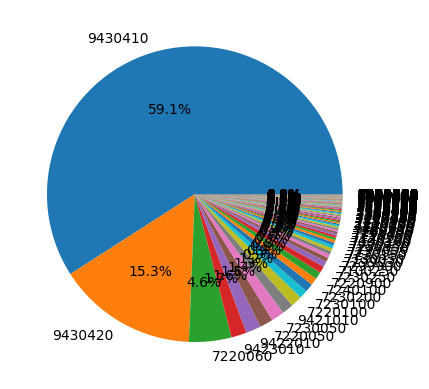

In [46]:
plt.pie(ce_values, labels=ce_names, autopct='%1.1f%%')